# Stock Analysis Using Stocker 

This notebook will walk through a basic example of using the Stocker class to analyze Bitcoin. The Stocker class is built on the crypto_signal app and the fbprophet additive model library but hides all that code behind the scenes so you can focus on making sense of the data! 

In [1]:
#Note: before launching Jupyter lab, need to export: export DJANGO_SETTINGS_MODULE=crypto_signal.settings
import django
django.setup()
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Import the Class


In [2]:
from crypto_track.stocker import Stocker

## Instantiate a Stocker Object

An object is an instance of a Python class. To create a stocker object, we call the Stocker class with a valid crypto ticker (currently only BTC available). We will be using Bitcoin throughout this example. If successful, the call will display that the data was retrieved and the date range. 

In [3]:
bitcoin = Stocker('BTC')

BTC Stocker Initialized. Data covers 2013-01-14 to 2018-12-02.


The Stocker object contains a number of attributes, or pieces of data, and methods, functions that act on that data. 
One attribute is the stock history, which is a dataframe. We can assign this to a variable and then look at the dataframe.

In [4]:
stock_history = bitcoin.stock
stock_history.head()

,index,crypto_traded,currency_quoted,data_source,id,period_close,period_high,period_interval,period_low,period_open,period_start_timestamp,period_volume,search_trend_id,update_timestamp,Date,ds,y,Daily Change
0,0,BTC,USD,Nomics https://api.nomics.com/v1/candles,23372,14.53295,14.5373700000,1d,14.5329500000,14.53737,2013-01-14T00:00:00Z,295.0,2013-01-14,2018-12-05 15:14:46.387875+00:00,2013-01-14,2013-01-14,14.53295,-0.00442
1,1,BTC,USD,Nomics https://api.nomics.com/v1/candles,23373,14.76857,14.7685700000,1d,14.5247900000,14.52479,2013-01-15T00:00:00Z,945.0,2013-01-15,2018-12-05 15:14:46.387875+00:00,2013-01-15,2013-01-15,14.76857,0.24378
2,2,BTC,USD,Nomics https://api.nomics.com/v1/candles,23374,15.02460,15.0246000000,1d,14.7492000000,14.74920,2013-01-16T00:00:00Z,2419.0,2013-01-16,2018-12-05 15:14:46.387875+00:00,2013-01-16,2013-01-16,15.02460,0.27540
3,3,BTC,USD,Nomics https://api.nomics.com/v1/candles,23375,15.96468,15.9646800000,1d,15.1367900000,15.13679,2013-01-17T00:00:00Z,8011.0,2013-01-17,2018-12-05 15:14:46.387875+00:00,2013-01-17,2013-01-17,15.96468,0.82789
4,4,BTC,USD,Nomics https://api.nomics.com/v1/candles,23376,15.99800,16.2627800000,1d,15.7488000000,16.03437,2013-01-18T00:00:00Z,5762.0,2013-01-18,2018-12-05 15:14:46.387875+00:00,2013-01-18,2013-01-18,15.99800,-0.03637


The advantages of a class is that the data and the functions which act on the data are associated with a single variable. In effect, a class is an uber data-structure because it contains within it other data and functions. Here we will use one of the Stocker methods to plot the history of the stock. 

# Data Exploration

First, a basic plot of the stock history and a few statistics.

Maximum period_close = 19409.63 on 2017-12-16.
Minimum period_close = 14.53 on 2013-01-14.
Current period_close = 4133.07 on 2018-12-02.



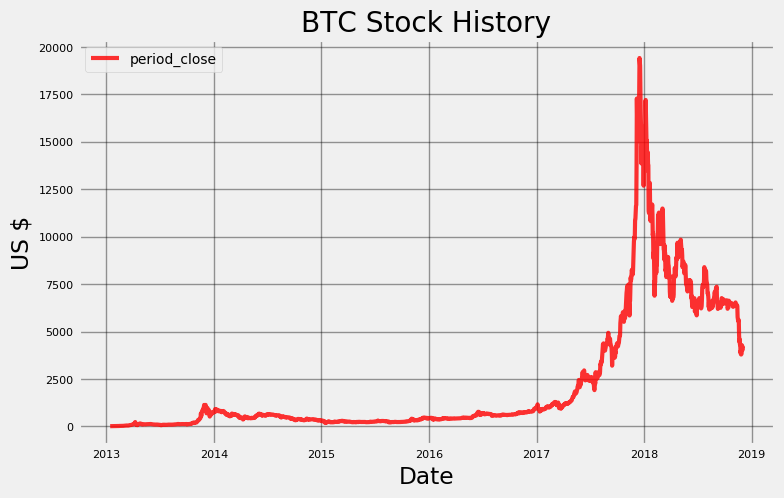

In [5]:
bitcoin.plot_stock()

The plot_stock method accepts a number of arguments that control the range of data plotted, the statistics plotted, and the type of plot. In a Jupyter notebook, you can type a function, and with your cursor in the parenthesis, press shift + tab to view all the available function parameters. Here we will plot the daily change in price and the daily volumn as a percentage relative to the average value. 

Maximum Daily Change = 3498.87 on 2017-12-07.
Minimum Daily Change = -2457.83 on 2018-01-16.
Current Daily Change = -53.20 on 2018-12-02.

Maximum period_volume = 15293549250.00 on 2018-01-05.
Minimum period_volume = 336952.00 on 2015-01-01.
Current period_volume = 800867677.00 on 2018-12-02.



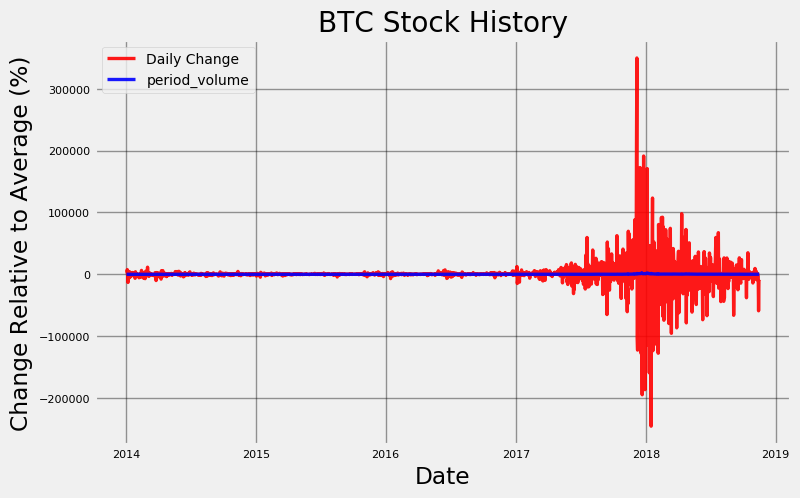

In [6]:
bitcoin.plot_stock(start_date = '2014-01-03', end_date = '2018-11-16', 
                     stats = ['Daily Change', 'period_volume'], plot_type='pct')

## Potential Profit

If we want to feel good about ourselves, we can pretend as if we had the fortune of mind to invest in Bitcoin at the beginning with 100 units. We can then evaluate the potential profit we would have from those shares. You can also change the dates if you feel like trying to lose money! 

BTC Total buy and hold profit from 2013-01-14 to 2018-12-02 for 100 shares = $411853.01


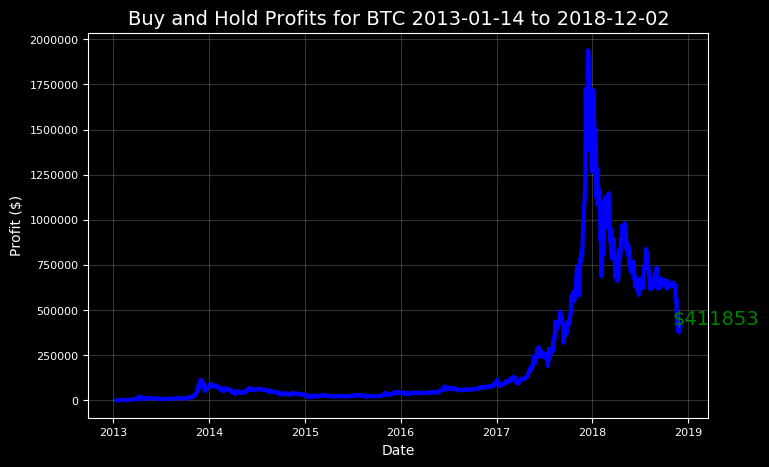

In [7]:
bitcoin.buy_and_hold(start_date='2013-01-14', end_date='2018-12-02', nshares=100)

BTC Total buy and hold profit from 2014-01-05 to 2016-01-03 for 100 shares = $-40078.37


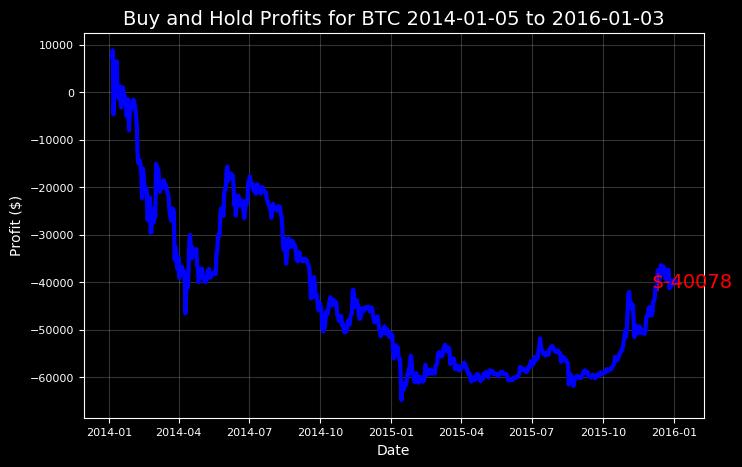

In [8]:
bitcoin.buy_and_hold(start_date='2014-01-05', end_date='2016-01-03', nshares=100)

Surprisingly, we can lose money playing the stock market! 

# Trends and Patterns

An additive model represents a time series as an overall trend and patterns on different time scales (yearly, monthly, seasonally). While the overall direction of Bitcoin is positive, it might happen to decrease every Tuesday, which if true, we could use to our advantage in playing the stock market. 

The Prophet library, developed by Facebook provides simple implementations of additive models. It also has advanced capabilities for those willing to dig into the code. The Stocker object does the tough work for us so we can use it to just see the results. 
Another method allows us to create a prophet model and inspect the results. This method returns two objects, model and data, which we need to save to plot the different trends and patterns.

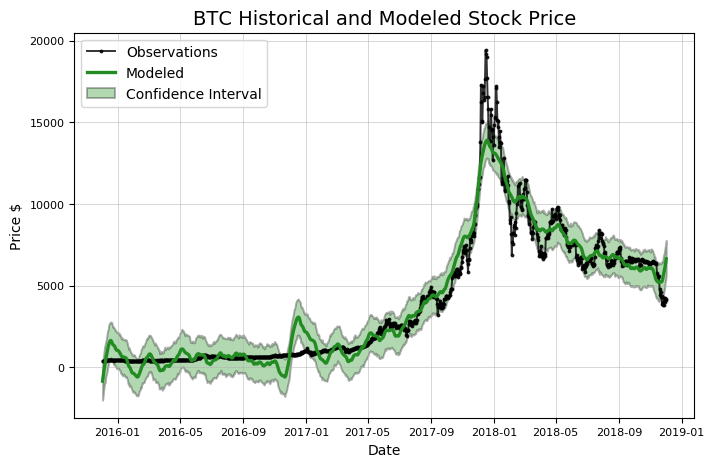

In [9]:
model, model_data = bitcoin.create_prophet_model()

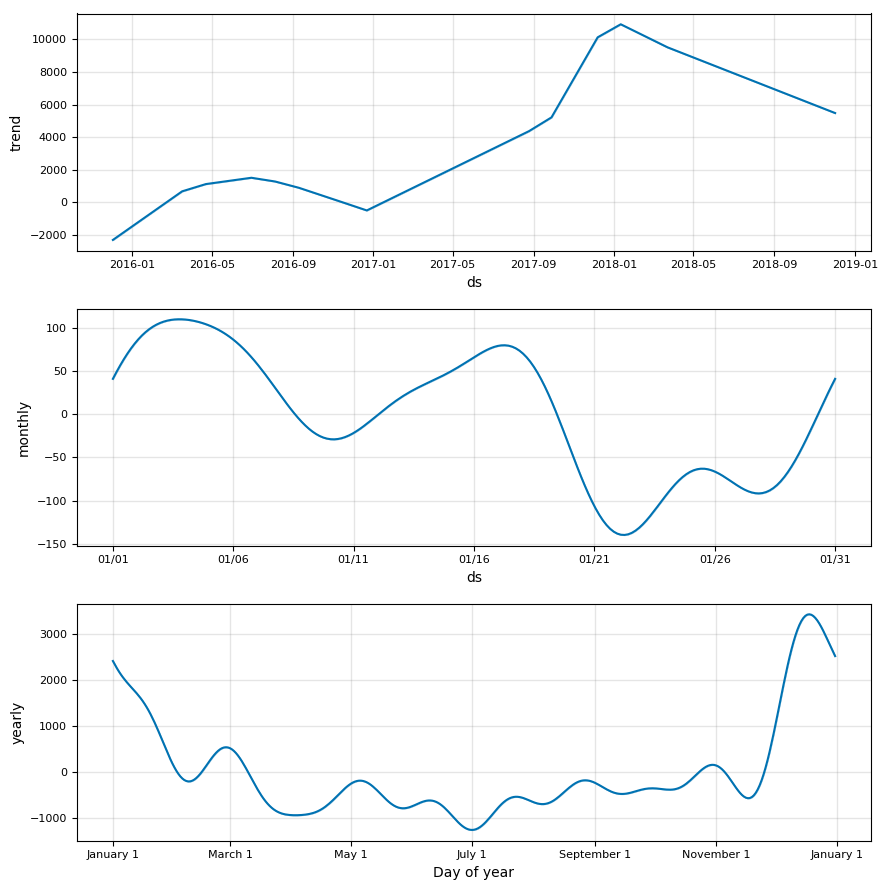

In [10]:
model.plot_components(model_data)
plt.show()

The overall trend is in the upwards direction over the past three years. The trend over the course of a year appears to be a decreased in April, July, and October with the greatest increases in December and January. As the time scale decreases, the patterns grow more noisy. The monthly pattern appears to be slightly random, and I would not place too much confidence in investing the first week of the month! 

If we think there may be meaningful weekly trends, we can add in a weekly seasonality component by modifying the associated attribute on our Stocker object. We then recreate the model and plot the components. 

In [11]:
print(bitcoin.weekly_seasonality)
bitcoin.weekly_seasonality = True
print(bitcoin.weekly_seasonality)

False
True


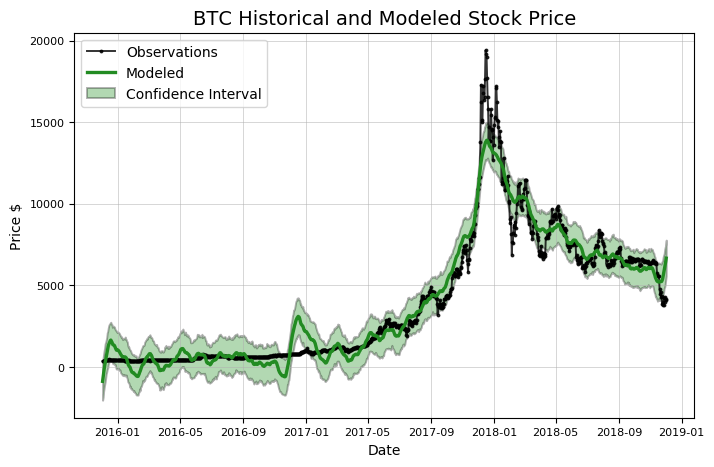

In [12]:
model, model_data = bitcoin.create_prophet_model(days=0)

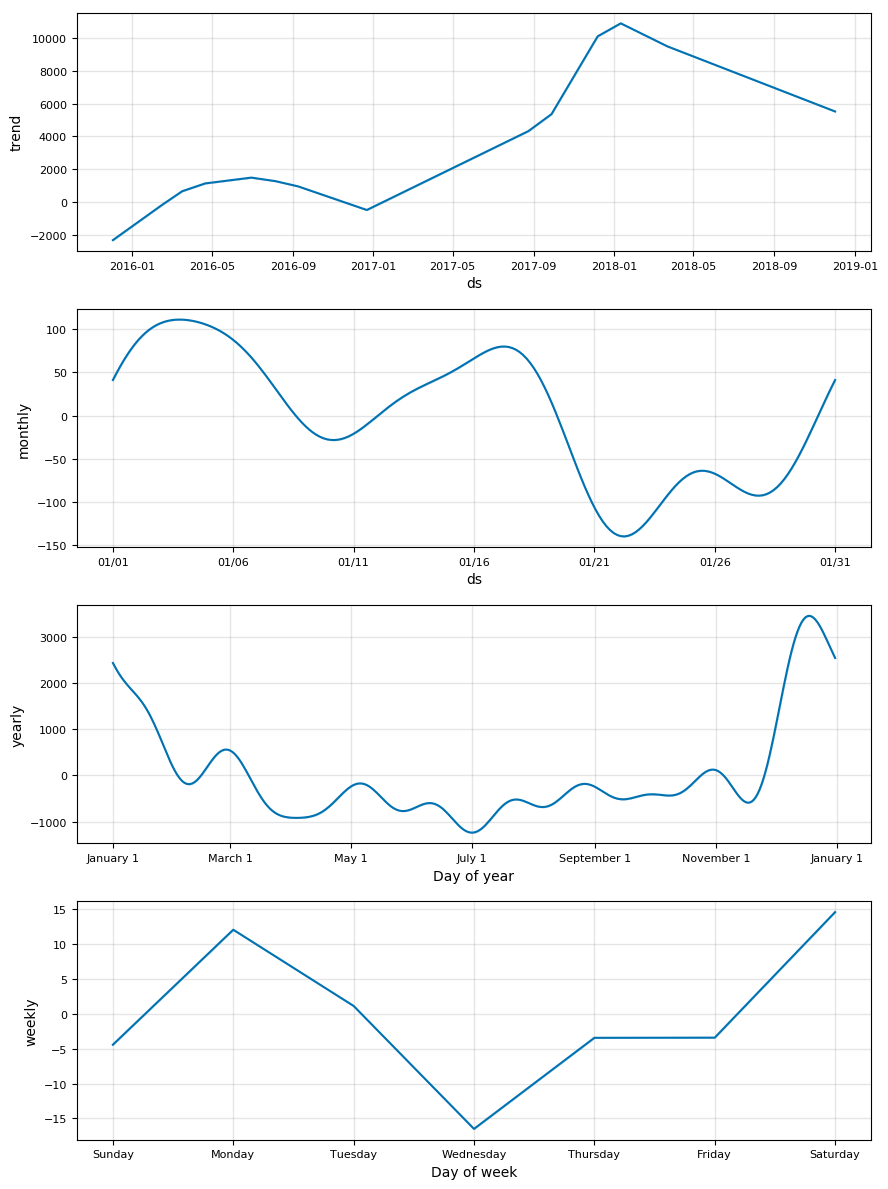

In [13]:
model.plot_components(model_data)
plt.show()

We have added a weekly component into the data. Interestingly, we can see a dip on Sundays and Wednesdays.

# Changepoints

One of the most important concepts in a time-series is changepoints. These occur at the maximum value of the second derivative. If that doesn't make much sense, they are times when the series goes from increasing to decreasing or vice versa, or when the series goes from increasing slowly to increasing rapidly. 

We can easily view the changepoints identified by the Prophet model with the following method. This lists the changepoints and displays them on top of the actual data for comparison.

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['delta'] = deltas
/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['abs_delta'] = abs(c_data['delta'])



Changepoints sorted by slope rate of change (2nd derivative):

          Date  period_close     delta
735 2017-12-07   17276.74212 -2.547841
770 2018-01-11   13488.93955 -2.402536
665 2017-09-28    4178.63412  2.157833
385 2016-12-22     875.54324  1.889631
105 2016-03-17     419.88721 -0.773488


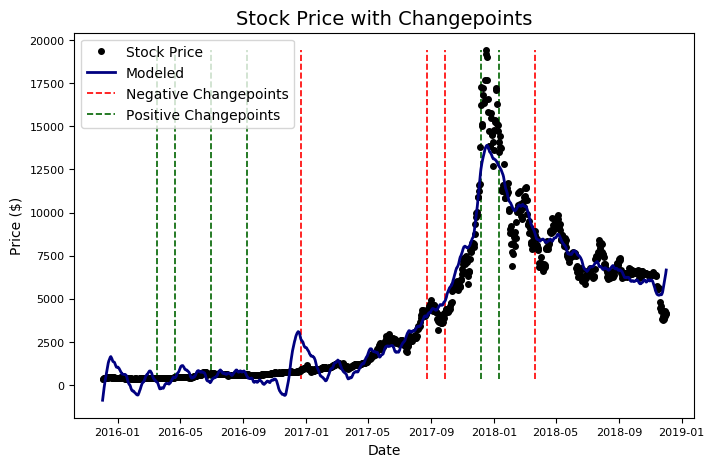

In [14]:
bitcoin.changepoint_date_analysis()

Prophet only identifies changepoints in the first 80% of the data, but it still gives us a good idea of where the most movement happens. It we wanted, we could look up news about Bitcoin on those dates and try to corroborate with the changes. However, this is built into Stocker. 

If we specify a search term in the call to `changepoint_date_analysis`, behind the scenes, Stocker will query the Google Search Trends api for that term. The method then displays the top related queries, the top rising queries, and provides a graph. The graph is probably the most valuable part as it shows the frequency of the search term and the changepoints on top of the actual data. This allows us to try and corroborate the search term with either the changepoints or the share price. 

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['delta'] = deltas
/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['abs_delta'] = abs(c_data['delta'])



 Top Related Queries: 

           query  value
0     btc to usd    100
1   1 btc to usd     32
2        bitcoin     26
3  btc price usd     16

 Rising Related Queries: 

           query    value
0     btc to usd  1194750
1   1 btc to usd   377050
2        bitcoin   314000
3  btc price usd   187850


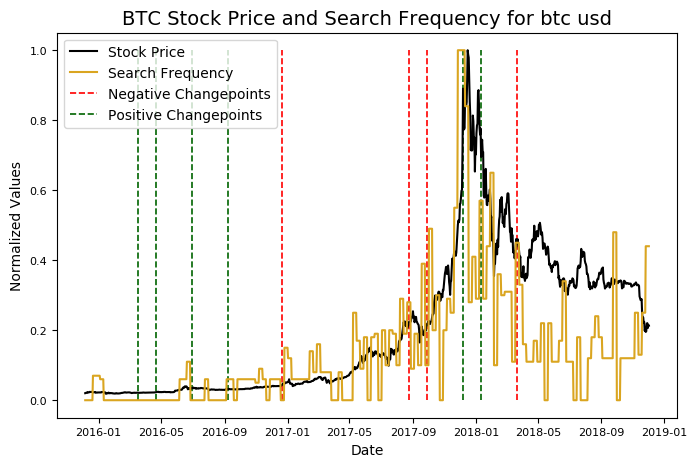

In [17]:
bitcoin.changepoint_date_analysis(search = 'btc usd')

There looks to be more signal in the search frequency graph than noise! I'm sure there may be correlations, but the question is whether there are meaningful causes. We can use any search term we want, and there are likely to be all sorts of correlations that are unexpected but are just noise. It might not be a great idea to assign the search frequency much weight. Nonetheless, it is an interesting exercise! 

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['delta'] = deltas
/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['abs_delta'] = abs(c_data['delta'])



 Top Related Queries: 

              query  value
0     bitcoin price    100
1      bitcoin news     55
2      bitcoin cash     35
3  ethereum bitcoin     28
4          ethereum     27

 Rising Related Queries: 

           query  value
0   bitcoin fork  89150
1   bitcoin 2018  67850
2  trump bitcoin  57550
3            xrp  52750
4           iota  47700


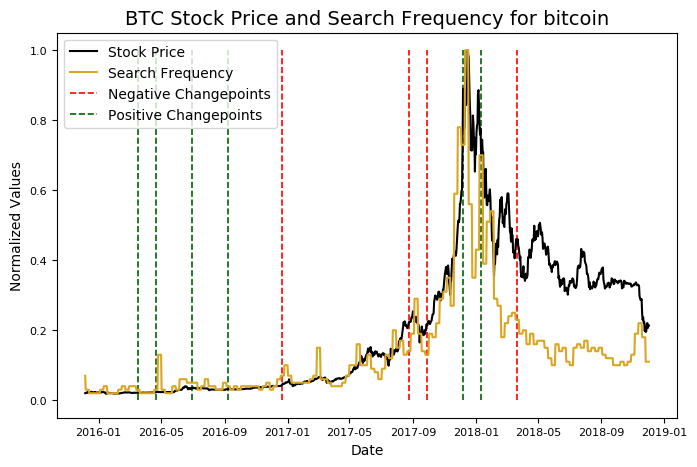

In [18]:
bitcoin.changepoint_date_analysis(search = 'bitcoin')

/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['delta'] = deltas
/Users/lauramay/Documents/GitHub/crypto_signal/crypto_signal/crypto_track/stocker.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  c_data['abs_delta'] = abs(c_data['delta'])



 Top Related Queries: 

                  query  value
0    how to buy bitcoin    100
1         bitcoin price     33
2  should i buy bitcoin     25

 Rising Related Queries: 

                  query   value
0  should i buy bitcoin  183600


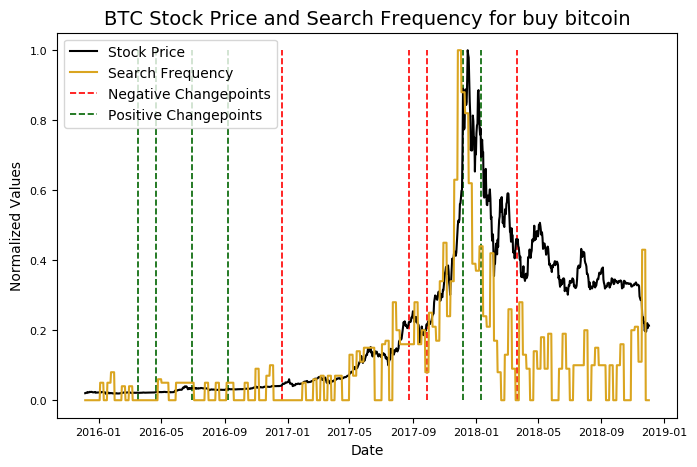

In [21]:
bitcoin.changepoint_date_analysis(search = 'buy bitcoin')

# Predictions

Now that we have analyzed the stock, the next question is where is it going? For that we will have to turn to predictions! 
That is for another notebook, but here is a little idea of what we can do (check out the documentation on GitHub for full details).

Predicted Price on 2019-05-31 = $1877.18


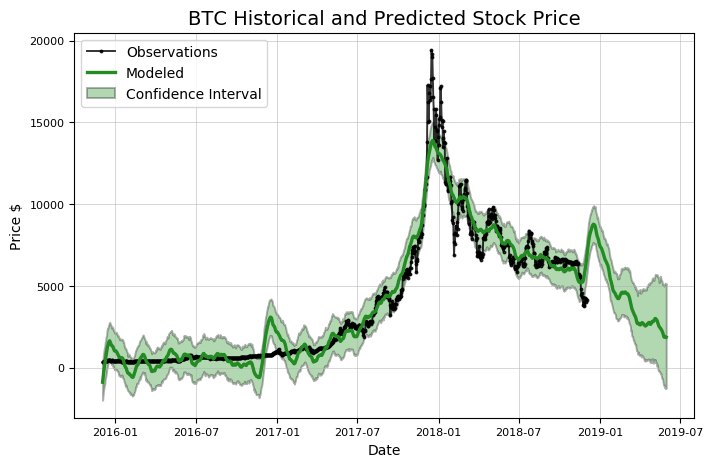

In [22]:
model, future =  bitcoin.create_prophet_model(days=180)